## Scraping Amazon con Selenium


### Importar las librerías necesarias

In [49]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd
import time


# Configurar el servicio y opciones de ChromeDriver

In [50]:
chrome_options = Options()
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--start-maximized")
chrome_options.headless = False  # Ensure browser is visible (not headless)


driver = webdriver.Remote(
    command_executor="http://selenium-server:4444/wd/hub",
    options=chrome_options
)

# driver.get()

In [51]:
# Navegar a Amazon
driver.get("https://www.amazon.com")
print("Página inicial:", driver.title)

Página inicial: Amazon.com. Spend less. Smile more.


In [34]:
# Función auxiliar para resaltar elementos
def highlight(element, driver, duration=2):
    original_style = element.get_attribute("style")
    driver.execute_script(
        "arguments[0].setAttribute('style', arguments[1]);",
        element,
        "border: 2px solid red; border-radius: 5px;"
    )
    time.sleep(duration)
    driver.execute_script(
        "arguments[0].setAttribute('style', arguments[1]);",
        element,
        original_style
    )


# driver.find_element()

### By.ID
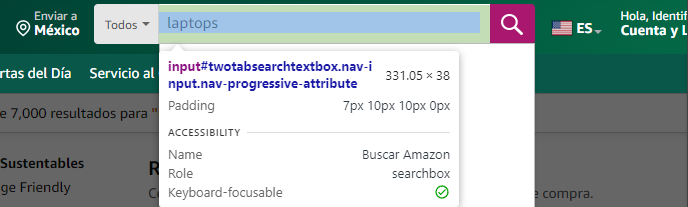

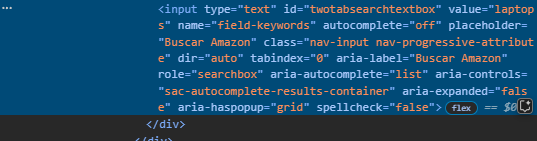

In [35]:
# Resaltar la barra de búsqueda
search_box = driver.find_element(By.ID, "twotabsearchtextbox")
highlight(search_box, driver)


### .send_keys(), .submit()


In [36]:
# Enviar texto y realizar búsqueda
search_box.send_keys("laptops")
search_box.submit()

# Confirmar que estamos en la página de resultados
print("Página de resultados:", driver.title)

Página de resultados: Amazon.com : laptops


# EXTRACCIÓN DE DATOS


### By.XPATH
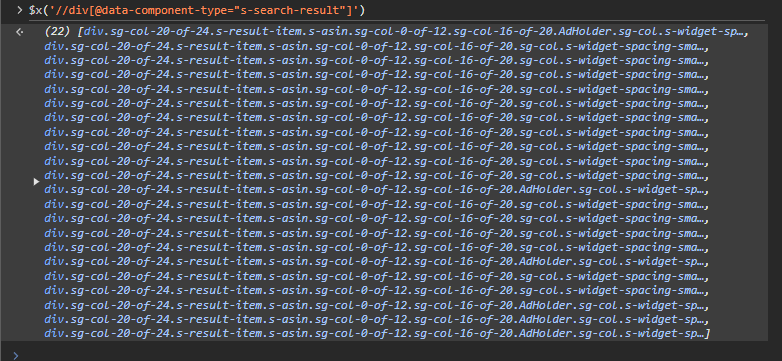

In [37]:
# Localizar los resultados de búsqueda
products = driver.find_elements(By.XPATH, '//div[@data-component-type="s-search-result"]')

# Mostrar cuántos productos se encontraron
print(f"Productos encontrados: {len(products)}")

# Extraer y resaltar el primer producto
if products:
    first_product = products[0]
    highlight(first_product, driver)
    print(products[0].text)



Productos encontrados: 21
Overall Pick


HP Stream 14" HD BrightView Laptop, Intel Celeron N4120, 16GB RAM, 288GB Storage (128GB eMMC + 160GB Docking Station Set), Intel UHD Graphics, 720p Webcam, Wi-Fi, 1 Year Office 365, Win 11 S, Silver
Options:
4 capacities
2,014
7K+ bought in past month
$309
00 List:
$399.00
$18.37 delivery
Ships to Mexico
Add to cart


# GUARDAR LOS DATOS EN CSV

### By.TAG_NAME, By.CLASS_NAME


In [38]:
# Extraer datos de todos los productos visibles
data = []
for product in products[:20]:  # Limitar a los primeros 10 productos
    try:
        # Extraer título
        title = product.find_element(By.TAG_NAME, "h2").text
    except:
        title = "N/A"
    try:
        # Extraer precio
        price = product.find_element(By.CLASS_NAME, "a-price-whole").text
    except:
        price = "N/A"
    try:
        # Extraer enlace
        link = product.find_element(By.TAG_NAME, "a").get_attribute("href")
    except:
        link = "N/A"
    
    # Añadir datos al listado
    data.append({"Title": title, "Price": price, "Link": link})

# Convertir los datos a un DataFrame
df = pd.DataFrame(data)
df



,Title,Price,Link
0,"HP Stream 14"" HD BrightView Laptop, Intel Cele...",309,https://www.amazon.com/HP-Stream-BrightView-N4...
1,"HP 14"" Ultral Light Laptop for Students and Bu...",265,https://www.amazon.com/HP-Students-Business-Qu...
2,"HP Stream 14"" HD Lightweight Laptop, Intel Cel...",299,https://www.amazon.com/HP-Stream-Lightweight-G...
3,"HP Portable Laptop, Student and Business, 14"" ...",197,https://www.amazon.com/HP-Portable-Student-Bus...
4,"Lenovo V15 Newest 15.6"" FHD Business Laptop Co...",319,https://www.amazon.com/Lenovo-Business-Dual-Co...
5,"acer Aspire 3 A315-24PT-R0UX Slim Laptop, 15.6...",506,https://www.amazon.com/A315-24PT-R0UX-Display-...
6,acer Gateway Chromebook 311 CBO311-1H-C1MX Lap...,149,https://www.amazon.com/acer-Gateway-Chromebook...
7,"HP 17 Laptop, 17.3"" HD+ Touchscreen Display, 1...",979,https://www.amazon.com/HP-Touchscreen-Display-...
8,"Dell Inspiron Touchscreen Laptop, 15.6"" Busine...",498,https://www.amazon.com/Dell-Inspiron-Touchscre...
9,"jumper Laptop, Quad Core N5095 CPU, 16GB RAM 5...","1,099",https://www.amazon.com/jumper-Computer-Keyboar...


# NAVEGAR A LA PÁGINA DEL PRODUCTO

In [39]:
# Seleccionar el primer enlace del producto y navegar a su página
if data:
    first_product_url = data[0]["Link"]
    driver.get(first_product_url)

    # Capturar detalles del producto
    try:
        product_title = driver.find_element(By.ID, "productTitle").text
        print("Título del producto:", product_title)
    except:
        print("No se pudo encontrar el título del producto.")


Título del producto: HP Stream 14" HD BrightView Laptop, Intel Celeron N4120, 16GB RAM, 288GB Storage (128GB eMMC + 160GB Docking Station Set), Intel UHD Graphics, 720p Webcam, Wi-Fi, 1 Year Office 365, Win 11 S, Silver


# SCROLL DE LA PÁGINA

### .execute_script() 

In [40]:
# Realizar scroll para cargar más productos
driver.get("https://www.amazon.com/s?k=laptops")

# Desplazarse hacia abajo
for i in range(3):
    driver.execute_script(f"window.scrollTo(0, {(i+1)*1000});")
    time.sleep(2)



In [41]:
# Guardar los datos en un archivo CSV
df.to_csv("amazon_products.csv", index=False)
print("Datos guardados en 'amazon_products.csv'.")


Datos guardados en 'amazon_products.csv'.


# CAPTURAR PANTALLA
### .save_screenshot()


In [44]:
# Capturar pantalla de la página actual
driver.save_screenshot("amazon_results.png")
print("Captura de pantalla guardada como 'amazon_results.png'.")


Captura de pantalla guardada como 'amazon_results.png'.
amazon_results.png


# CERRAR EL NAVEGADOR


In [45]:
driver.quit()